In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import  BernoulliNB, GaussianNB, MultinomialNB

[[5 1 1 ... 1 1 2]
 [5 4 4 ... 2 1 2]
 [3 1 1 ... 1 1 2]
 ...
 [5 10 10 ... 10 2 4]
 [4 8 6 ... 6 1 4]
 [4 8 8 ... 4 1 4]]
489 210


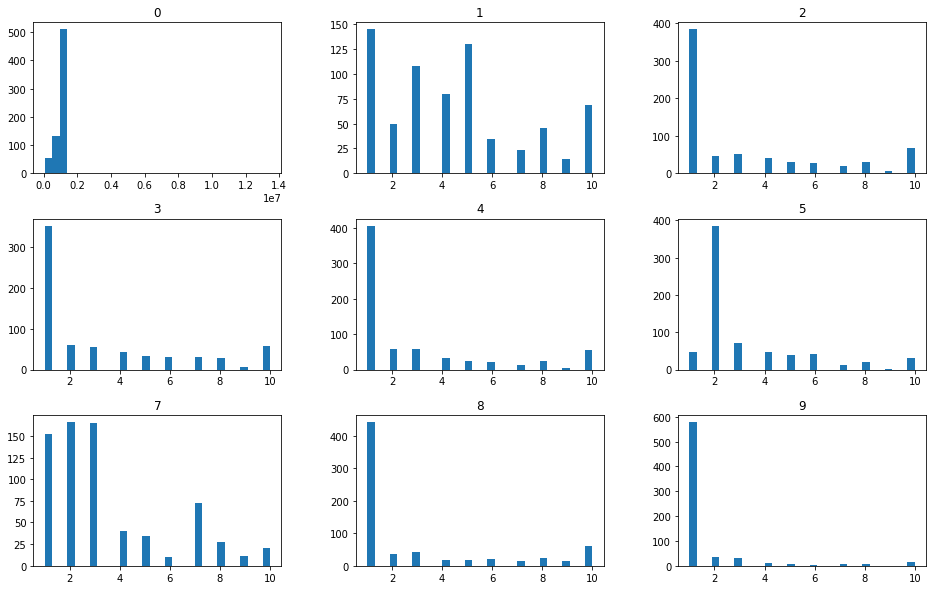

In [78]:
data = pd.read_csv("~/Desktop/mcc20192/mlearning/tareas/tarea2/nb_data/breast-cancer-wisconsin.data", header=None)
pd.DataFrame.hist(data.iloc[0:,:-1], grid=False,bins=30,figsize=(16,10))
data_matrix = data.values[0:,1:]
print(data_matrix)

#Partición aleatoria del conjunto de datos
train_data, test_data= train_test_split(data_matrix, test_size=0.30, random_state=100)
print(len(train_data),len(test_data))

In [60]:
def vector_of_experimental_means(matrix):
    means = np.zeros(9)
    for j in range(0,9):
        known_count = 0
        s = 0    
        for i in range(0,len(matrix)):
            if matrix[i][j] != '?':
                s += int(matrix[i][j])
                known_count += 1
            else: 
                print(i+1,j+1)
            means[j] = s/known_count
    return means

means = vector_of_experimental_means(data_matrix[0:,0:-1])

24 6
41 6
140 6
146 6
159 6
165 6
236 6
250 6
276 6
293 6
295 6
298 6
316 6
322 6
412 6
618 6


In [61]:
# Manejo de atributos desconocidos
def replace_unknown(matrix,v):
    for i in range(0,len(matrix)):
        for j in range(0,8):
            if matrix[i][j] == '?':
                matrix[i][j] = v[j]
    return matrix

In [62]:
# Preparación del conjunto de entrenamiento con reemplazo de atributos desconocidos por medias
train_matrix = replace_unknown(train_data[0:,0:-1],means)
train_labels = train_data[0:,-1]
train_labels=train_labels.astype('int')

# Preparación del conjunto de validación con reemplazo de atributos desconocidos por medias
test_matrix = replace_unknown(test_data[0:,0:-1],means)
test_labels = test_data[0:,-1]
test_labels=test_labels.astype('int')
#print(train_matrix)
#print(train_labels)
#print(test_matrix)
#print(test_labels)

In [63]:
# Proponemos los siguientes clasificadores
bernoulli_classifier = BernoulliNB(binarize = 1.0)
normal_classifier = GaussianNB()
multinomial_classifier = MultinomialNB()

# Entrenamiento
print(bernoulli_classifier.fit(train_matrix,train_labels))
print(normal_classifier.fit(train_matrix,train_labels))
print(multinomial_classifier.fit(train_matrix,train_labels))

BernoulliNB(alpha=1.0, binarize=1.0, class_prior=None, fit_prior=True)
GaussianNB(priors=None, var_smoothing=1e-09)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [64]:
# Pruebas en el conjunto de validación
test_bernoulli = bernoulli_classifier.predict(test_matrix)
test_normal = normal_classifier.predict(test_matrix)
test_multinomial = multinomial_classifier.predict(test_matrix)

# Pruebas en el conjunto de validación
train_bernoulli = bernoulli_classifier.predict(train_matrix)
train_normal = normal_classifier.predict(train_matrix)
train_multinomial = multinomial_classifier.predict(train_matrix)

def classification_errors(predicted,real):
    s = 0
    for i in range(0,len(predicted)):
        if predicted[i] != real[i]:
            s += 1
    return s

print('Sobre el conjunto de validación')    
print(classification_errors(test_bernoulli,test_labels))
print(classification_errors(test_normal,test_labels))
print(classification_errors(test_multinomial,test_labels))

print('Sobre el conjunto de entrenamiento')
print(classification_errors(train_bernoulli,train_labels))
print(classification_errors(train_normal,train_labels))
print(classification_errors(train_multinomial,train_labels))

Sobre el conjunto de validación
14
12
30
Sobre el conjunto de entrenamiento
27
14
46


In [65]:
# Preparación del conjunto de entrenamiento con reemplazo de atributos desconocidos por 0's
train_matrix = replace_unknown(train_data[0:,0:-1],np.zeros(9))
train_labels = train_data[0:,-1]
train_labels=train_labels.astype('int')

# Preparación del conjunto de validación con reemplazo de atributos desconocidos por 0's
test_matrix = replace_unknown(test_data[0:,0:-1],np.zeros(9))
test_labels = test_data[0:,-1]
test_labels=test_labels.astype('int')
#print(train_matrix)
#print(train_labels)
#print(test_matrix)
#print(test_labels)

In [66]:
# Proponemos los siguientes clasificadores
bernoulli_classifier = BernoulliNB(binarize = 1.0)
normal_classifier = GaussianNB()
multinomial_classifier = MultinomialNB()

# Entrenamiento
print(bernoulli_classifier.fit(train_matrix,train_labels))
print(normal_classifier.fit(train_matrix,train_labels))
print(multinomial_classifier.fit(train_matrix,train_labels))

BernoulliNB(alpha=1.0, binarize=1.0, class_prior=None, fit_prior=True)
GaussianNB(priors=None, var_smoothing=1e-09)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [67]:
# Pruebas en el conjunto de validación
test_bernoulli = bernoulli_classifier.predict(test_matrix)
test_normal = normal_classifier.predict(test_matrix)
test_multinomial = multinomial_classifier.predict(test_matrix)

# Pruebas en el conjunto de validación
train_bernoulli = bernoulli_classifier.predict(train_matrix)
train_normal = normal_classifier.predict(train_matrix)
train_multinomial = multinomial_classifier.predict(train_matrix)

def classification_errors(predicted,real):
    s = 0
    for i in range(0,len(predicted)):
        if predicted[i] != real[i]:
            s += 1
    return s

print('Sobre el conjunto de validación')    
print(classification_errors(test_bernoulli,test_labels))
print(classification_errors(test_normal,test_labels))
print(classification_errors(test_multinomial,test_labels))

print('Sobre el conjunto de entrenamiento')
print(classification_errors(train_bernoulli,train_labels))
print(classification_errors(train_normal,train_labels))
print(classification_errors(train_multinomial,train_labels))

Sobre el conjunto de validación
14
12
30
Sobre el conjunto de entrenamiento
27
14
46
